# Imports

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Loading and cleaning data

In [2]:
# Load data
DATA_PATH = "/Users/teymour/Desktop/cmor438/data/consumer-spending.csv"
df = pd.read_csv(DATA_PATH)

# Clean data (drop NA)
df = df.dropna()

# Data exploration

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


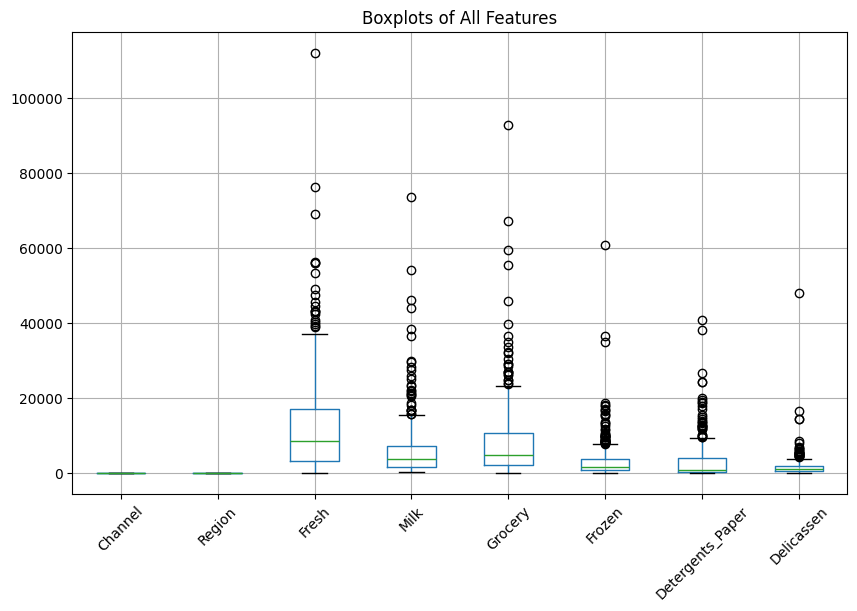

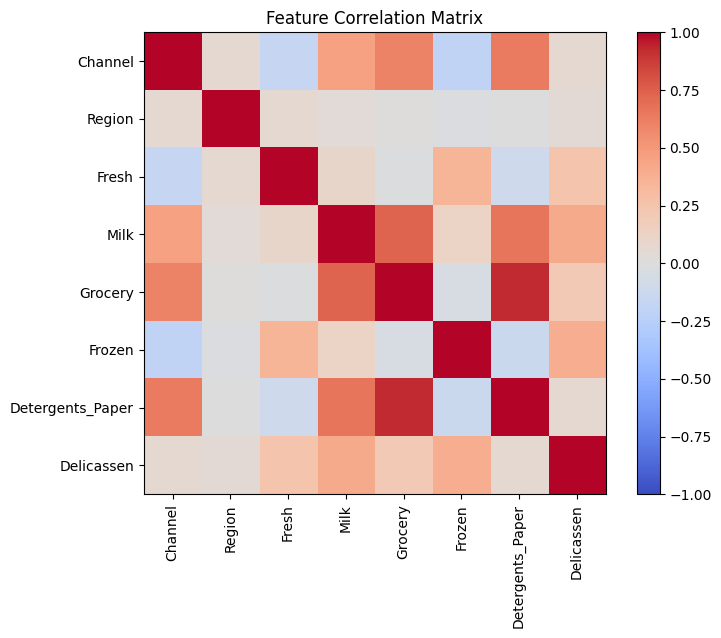

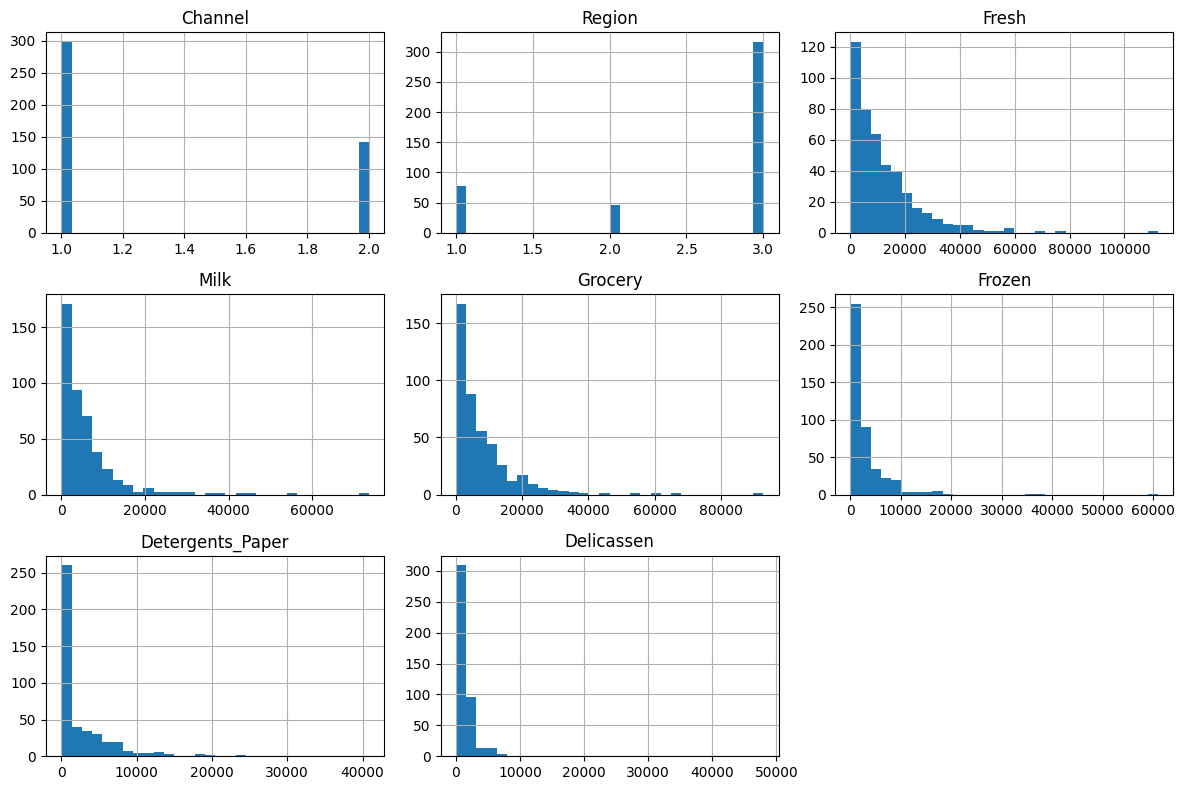

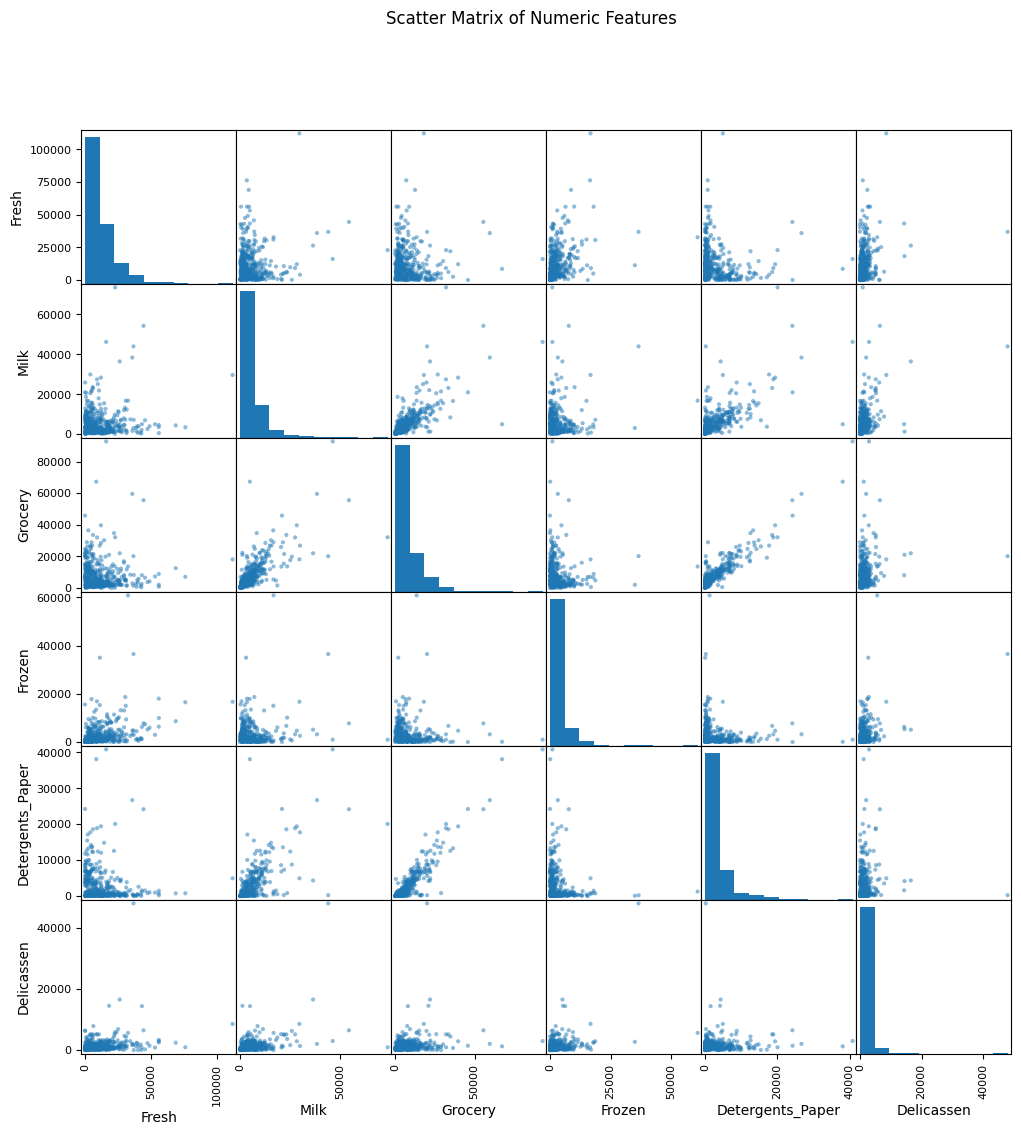

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [3]:
# descriptive statistics
display(df.describe())

# boxplots to spot outliers
plt.figure(figsize=(10, 6))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplots of All Features")
plt.show()

# correlation heatmap
corr = df.corr()
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Feature Correlation Matrix")
plt.show()

# histograms of each feature
df.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

# pairwise scatter matrix for numeric variables
numeric = df.columns.drop(['Channel', 'Region'])
scatter_matrix(df[numeric], figsize=(12, 12), diagonal='hist', alpha=0.5)
plt.suptitle("Scatter Matrix of Numeric Features")
plt.show()

# scale features for k-means
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric]), columns=numeric)
display(df_scaled.describe())

# K-means clustering model

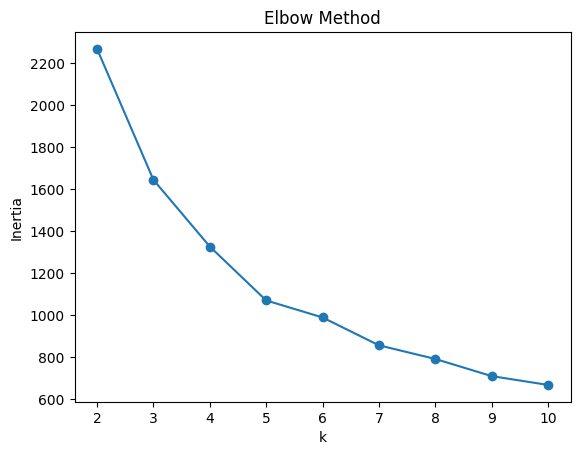

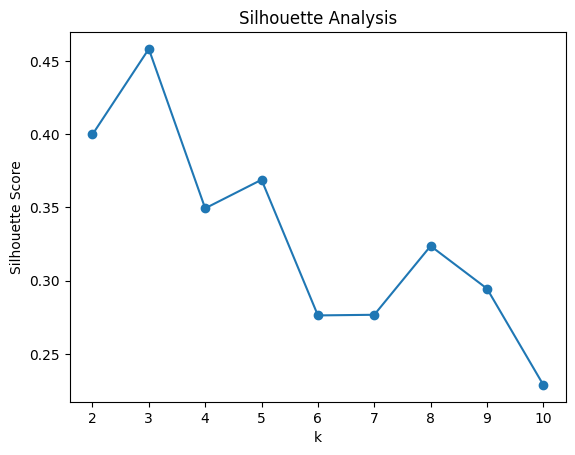

cluster
0    350
1     53
2     37
Name: count, dtype: int64

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,8935.500000,4228.528571,5848.034286,2167.231429,1913.605714,1102.120000
1,34540.113208,5860.358491,6122.622642,9841.735849,981.471698,3664.245283
2,8704.864865,20534.405405,30466.243243,1932.621622,14758.837838,2459.351351


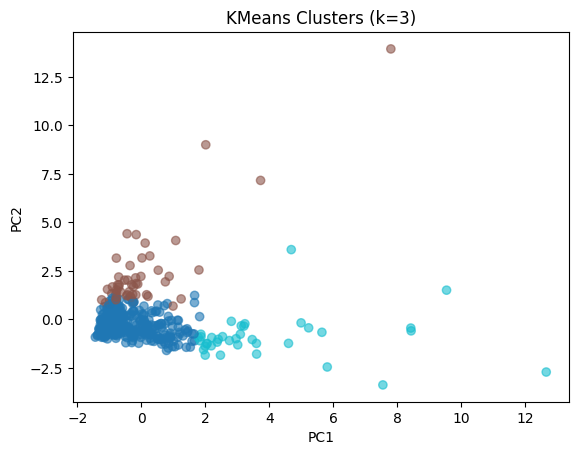

In [4]:
# select spending features
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = df[features]

# scale features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# find optimal k with elbow and silhouette
inertia = []
sil_scores = []
ks = range(2, 11)
for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure()
plt.plot(ks, inertia, 'o-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

plt.figure()
plt.plot(ks, sil_scores, 'o-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# fit final model (choose k based on above plots, e.g. k=3)
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# examine cluster sizes
display(df['cluster'].value_counts())

# inverse-transform centroids to original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=features)
display(centroids_df)

# visualize clusters in 2D via PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='tab10', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'KMeans Clusters (k={k_opt})')
plt.show()

# Discussion of results

Our elbow curve shows a sharp drop in inertia from k=2 to k=3 and then flattens, while silhouette score peaks at k=3 (≈0.46), confirming three clusters as optimal. Cluster 0 (n=350) exhibits moderate spending across all categories—average Fresh≈8 935, Milk≈4 228, Grocery≈5 848, Frozen≈2 167, Detergents≈1 914, Delicassen≈1 102. Cluster 1 (n=53) is high-volume fresh/frozen buyers—Fresh≈34 540, Frozen≈9 841—with low Detergents and Delicassen. Cluster 2 (n=37) spends heavily on grocery/milk/detergents—Grocery≈30 466, Milk≈20 534, Detergents≈14 758—with moderate Fresh.